In [1]:
import os

DIR = os.getcwd()
RAW_DATA_DIR = os.path.join(DIR, 'raw')
COUNTRIES_DIR = os.path.join(RAW_DATA_DIR, 'european_wholesale_electricity_price_data_hourly')

#Print the folders or files in the raw data directory
print(os.listdir(COUNTRIES_DIR))

['all_countries.csv', 'Austria.csv', 'Belgium.csv', 'Bulgaria.csv', 'Croatia.csv', 'Czechia.csv', 'Denmark.csv', 'Estonia.csv', 'Finland.csv', 'France.csv', 'Germany.csv', 'Greece.csv', 'Hungary.csv', 'Ireland.csv', 'Italy.csv', 'Latvia.csv', 'Lithuania.csv', 'Luxembourg.csv', 'Netherlands.csv', 'North Macedonia.csv', 'Norway.csv', 'Poland.csv', 'Portugal.csv', 'Romania.csv', 'Serbia.csv', 'Slovakia.csv', 'Slovenia.csv', 'Spain.csv', 'Sweden.csv', 'Switzerland.csv']


In [2]:
spain_path = os.path.join(COUNTRIES_DIR, 'spain.csv')
print(spain_path)

#Read the data from the file
import pandas as pd
spain_data = pd.read_csv(spain_path)
print(spain_data.head())


c:\Users\tinus\OneDrive\Dokumenter\0 Master\code\specialization_project\data\raw\european_wholesale_electricity_price_data_hourly\spain.csv
  Country ISO3 Code       Datetime (UTC)     Datetime (Local)  \
0   Spain       ESP  2015-01-01 00:00:00  2015-01-01 01:00:00   
1   Spain       ESP  2015-01-01 01:00:00  2015-01-01 02:00:00   
2   Spain       ESP  2015-01-01 02:00:00  2015-01-01 03:00:00   
3   Spain       ESP  2015-01-01 03:00:00  2015-01-01 04:00:00   
4   Spain       ESP  2015-01-01 04:00:00  2015-01-01 05:00:00   

   Price (EUR/MWhe)  
0             48.10  
1             47.33  
2             42.27  
3             38.41  
4             35.72  


In [3]:
print(pd.to_datetime(spain_data["Datetime (UTC)"]).dt.year.unique())

[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [4]:
spain_data.columns

Index(['Country', 'ISO3 Code', 'Datetime (UTC)', 'Datetime (Local)',
       'Price (EUR/MWhe)'],
      dtype='object')

In [5]:
# Print the type of the columns
print(spain_data.dtypes)


Country              object
ISO3 Code            object
Datetime (UTC)       object
Datetime (Local)     object
Price (EUR/MWhe)    float64
dtype: object


In [6]:
print(spain_data['Datetime (Local)'].head())

0    2015-01-01 01:00:00
1    2015-01-01 02:00:00
2    2015-01-01 03:00:00
3    2015-01-01 04:00:00
4    2015-01-01 05:00:00
Name: Datetime (Local), dtype: object


In [7]:
spain_data['Datetime (Local)'] = pd.to_datetime(spain_data['Datetime (Local)'])

In [8]:
spain_data.head()

,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe)
0,Spain,ESP,2015-01-01 00:00:00,2015-01-01 01:00:00,48.10
1,Spain,ESP,2015-01-01 01:00:00,2015-01-01 02:00:00,47.33
2,Spain,ESP,2015-01-01 02:00:00,2015-01-01 03:00:00,42.27
3,Spain,ESP,2015-01-01 03:00:00,2015-01-01 04:00:00,38.41
4,Spain,ESP,2015-01-01 04:00:00,2015-01-01 05:00:00,35.72


In [9]:
# Extract the year from the 'Datetime (Local)' column
spain_data['Year'] = spain_data['Datetime (Local)'].dt.year
spain_data['Month'] = spain_data['Datetime (Local)'].dt.month
spain_data['Day'] = spain_data['Datetime (Local)'].dt.day
spain_data['Hour'] = spain_data['Datetime (Local)'].dt.hour

spain_data.head()


,Country,ISO3 Code,Datetime (UTC),Datetime (Local),Price (EUR/MWhe),Year,Month,Day,Hour
0,Spain,ESP,2015-01-01 00:00:00,2015-01-01 01:00:00,48.10,2015,1,1,1
1,Spain,ESP,2015-01-01 01:00:00,2015-01-01 02:00:00,47.33,2015,1,1,2
2,Spain,ESP,2015-01-01 02:00:00,2015-01-01 03:00:00,42.27,2015,1,1,3
3,Spain,ESP,2015-01-01 03:00:00,2015-01-01 04:00:00,38.41,2015,1,1,4
4,Spain,ESP,2015-01-01 04:00:00,2015-01-01 05:00:00,35.72,2015,1,1,5


In [10]:
spain_data_2023 = spain_data[spain_data['Year'] == 2023]

In [11]:
spain_data_2023.reset_index(drop=True, inplace=True)
print(spain_data_2023.head())

  Country ISO3 Code       Datetime (UTC)    Datetime (Local)  \
0   Spain       ESP  2022-12-31 23:00:00 2023-01-01 00:00:00   
1   Spain       ESP  2023-01-01 00:00:00 2023-01-01 01:00:00   
2   Spain       ESP  2023-01-01 01:00:00 2023-01-01 02:00:00   
3   Spain       ESP  2023-01-01 02:00:00 2023-01-01 03:00:00   
4   Spain       ESP  2023-01-01 03:00:00 2023-01-01 04:00:00   

   Price (EUR/MWhe)  Year  Month  Day  Hour  
0               0.0  2023      1    1     0  
1               0.0  2023      1    1     1  
2               0.0  2023      1    1     2  
3               0.0  2023      1    1     3  
4               0.0  2023      1    1     4  


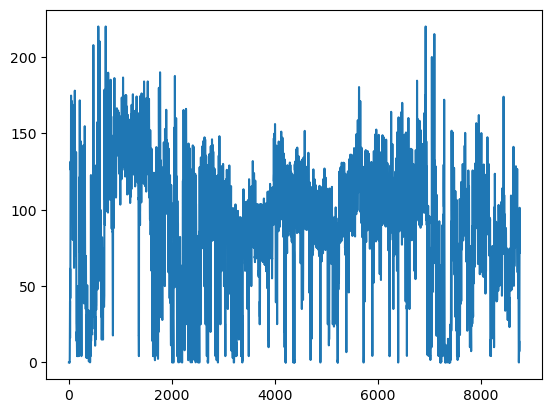

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(spain_data_2023)), spain_data_2023['Price (EUR/MWhe)'])

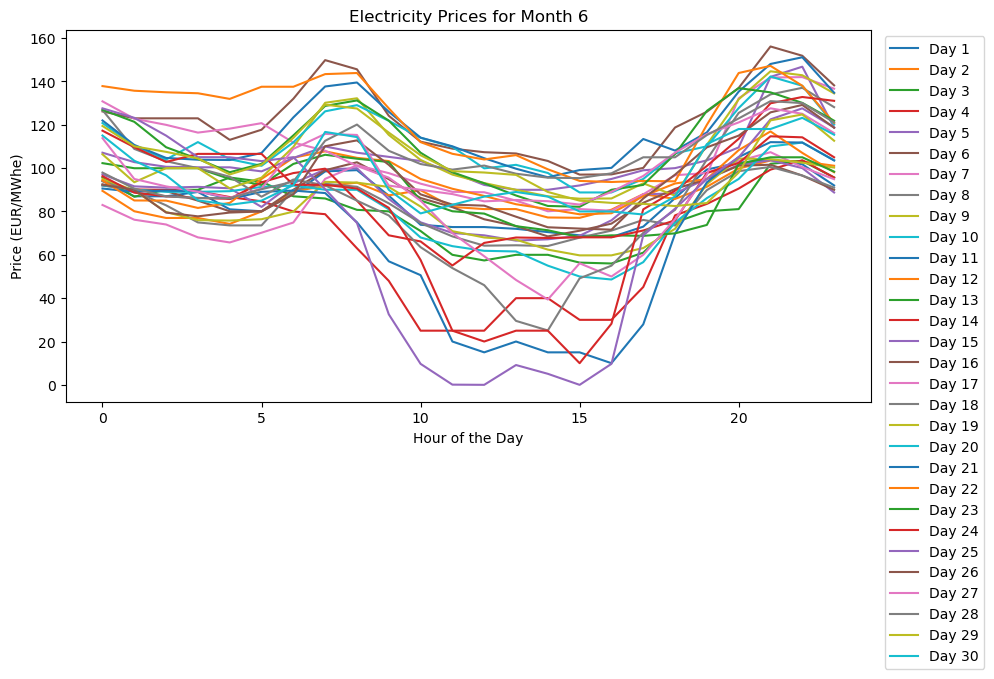

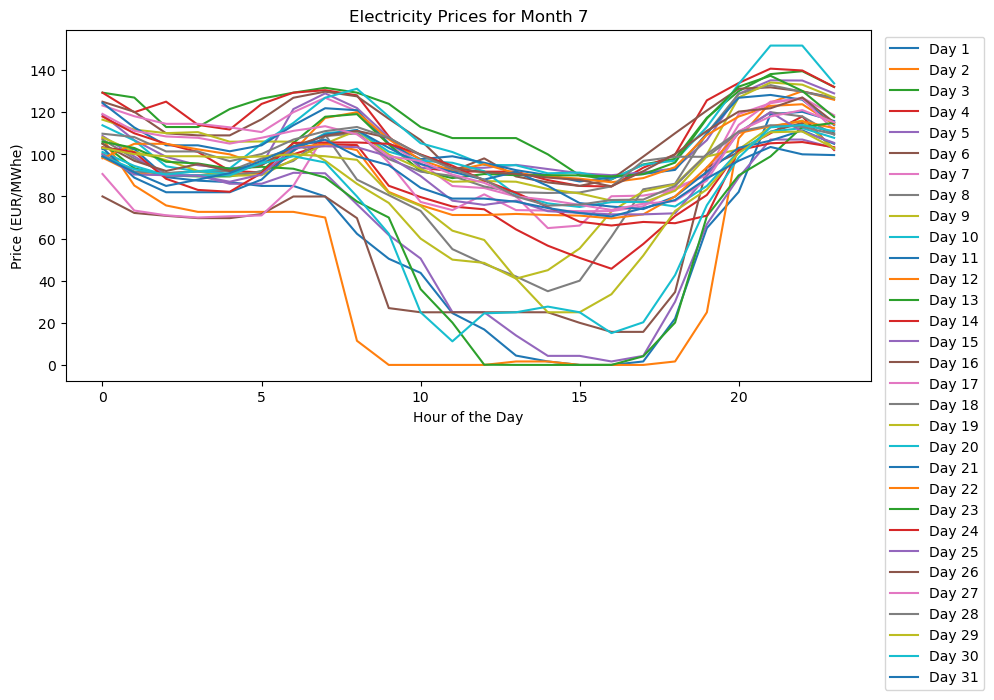

In [13]:
# Group the data by month
for month in range(6, 8):
    # Filter the data for the current month
    month_data = spain_data_2023[spain_data_2023['Month'] == month]
    
    # Create a new figure for the current month
    plt.figure(figsize=(10, 6))
    
    # Group the data by day
    for day in month_data['Day'].unique():
        # Filter the data for the current day
        day_data = month_data[month_data['Day'] == day]
        
        # Plot the electricity prices for each hour
        plt.plot(day_data['Hour'], day_data['Price (EUR/MWhe)'], label=f'Day {day}')
    
    # Set plot title and labels
    plt.title(f'Electricity Prices for Month {month}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Price (EUR/MWhe)')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Display the plot
    plt.tight_layout()
    plt.show()


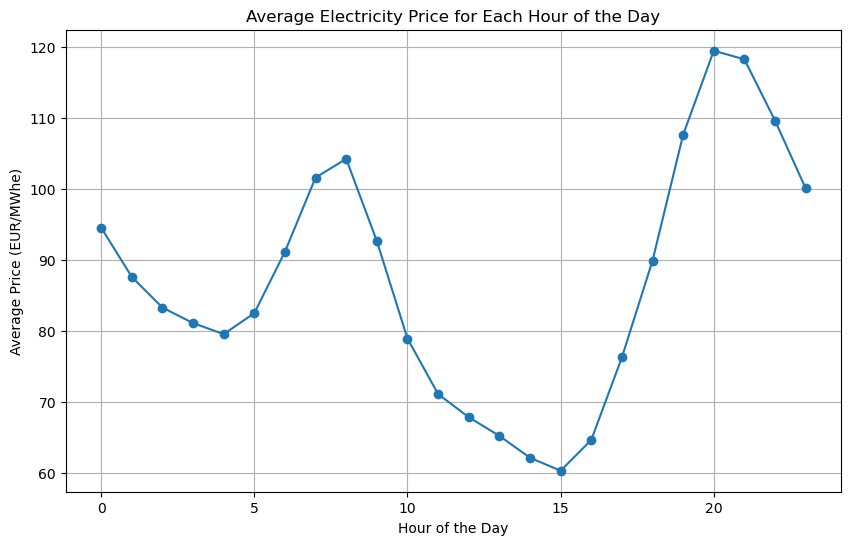

In [14]:
# Group the data by the 'Hour' column and calculate the mean price for each hour
average_price_per_hour = spain_data_2023.groupby('Hour')['Price (EUR/MWhe)'].mean()

# Plot the average electricity price for each hour
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_hour.index, average_price_per_hour.values, marker='o')

# Set plot title and labels
plt.title('Average Electricity Price for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (EUR/MWhe)')

# Display the plot
plt.grid(True)
plt.show()


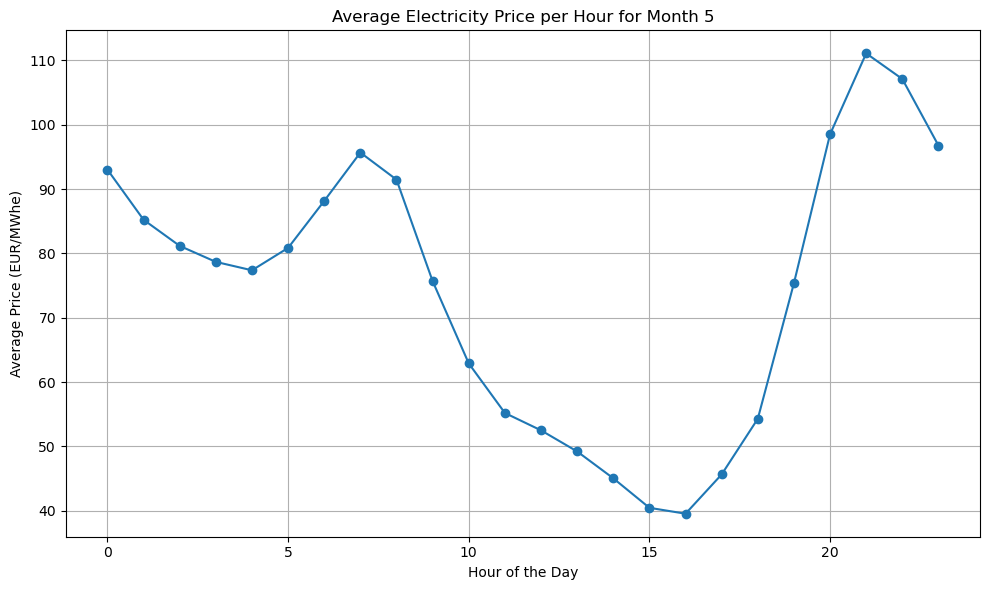

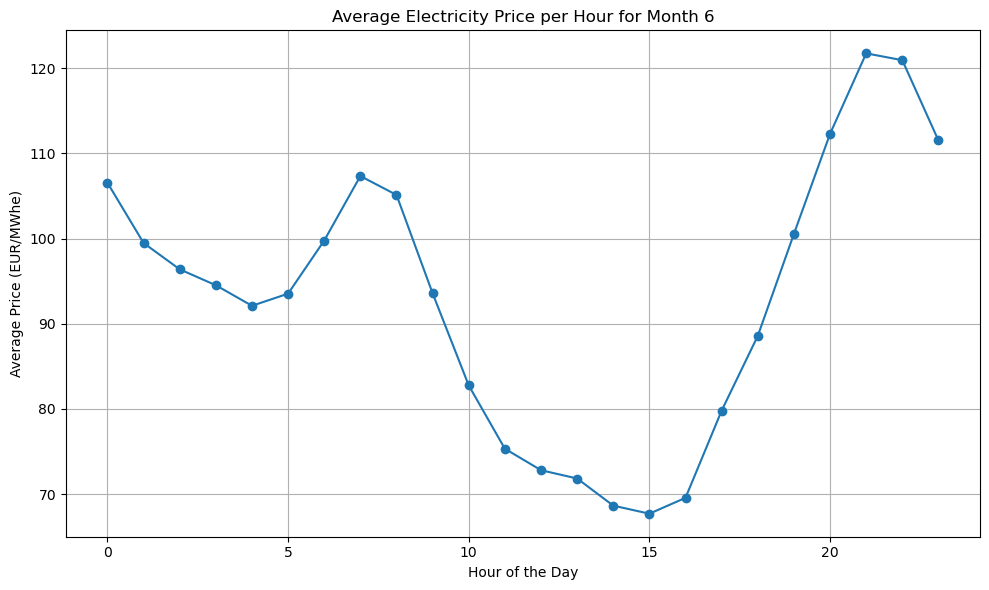

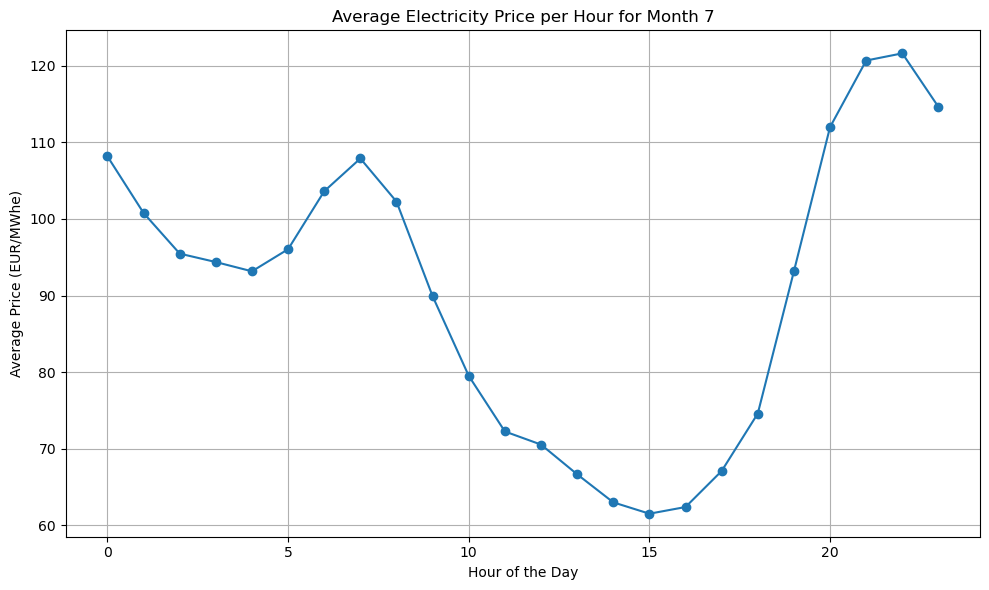

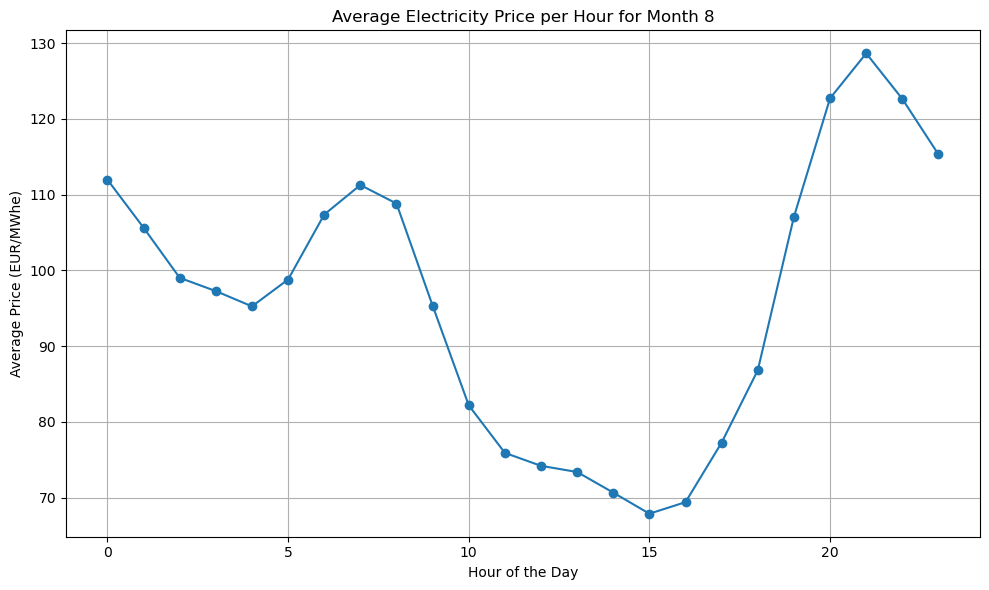

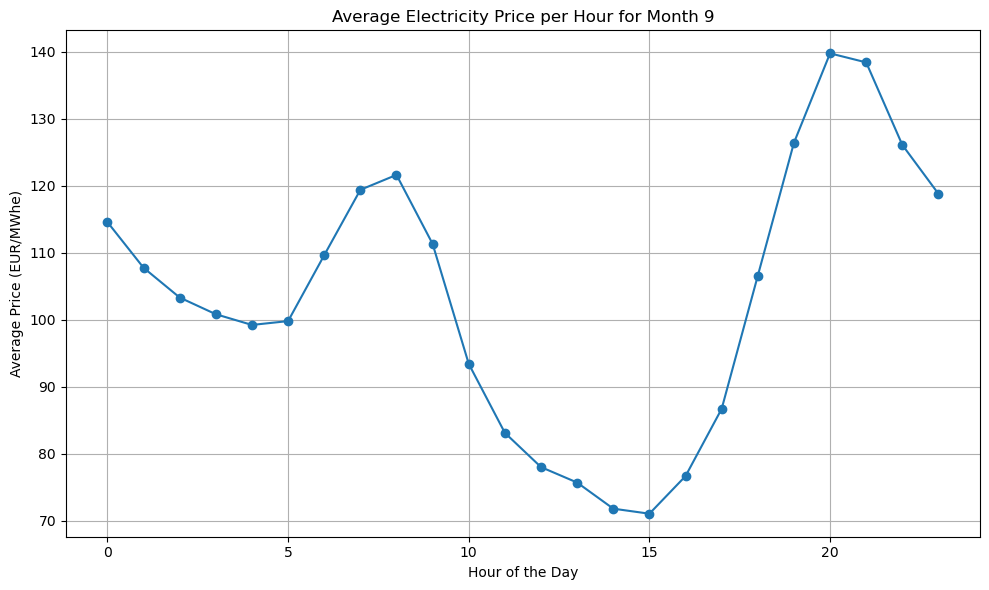

In [15]:
import matplotlib.pyplot as plt

# Loop through each month (1 to 12)
for month in range(5, 10):
    # Filter the data for the current month
    month_data = spain_data_2023[spain_data_2023['Month'] == month]
    
    # Group by 'Hour' and calculate the mean price for each hour in the current month
    average_price_per_hour = month_data.groupby('Hour')['Price (EUR/MWhe)'].mean()

    # Create a new figure for the current month
    plt.figure(figsize=(10, 6))
    
    # Plot the average price for each hour
    plt.plot(average_price_per_hour.index, average_price_per_hour.values, marker='o')
    
    # Set plot title and labels
    plt.title(f'Average Electricity Price per Hour for Month {month}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Price (EUR/MWhe)')
    
    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:
SAVE_DIR = os.path.join(DIR, 'processed')
SAVE_PATH = os.path.join(SAVE_DIR, 'electricity_prices_spain_2023.csv')

In [18]:
spain_data_2023.to_csv(SAVE_PATH, index=False)